# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=09116d67fbb10dba2280720c4e4533e7"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | pullman
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | new plymouth
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | vilyuchinsk
Processing Record 15 of Set 1 | flying fish cove
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | grand baie
Processing Record 20 of Set 1 | tangalle
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | vingt cinq
City not found

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,275.92,93,100,3.09,US,1704765817
1,bethel,41.3712,-73.4140,272.96,81,0,1.54,US,1704765798
2,bilibino,68.0546,166.4372,242.40,96,100,1.47,RU,1704766077
3,whitehorse,60.7161,-135.0538,255.38,99,50,0.63,CA,1704766078
4,ushuaia,-54.8000,-68.3000,278.96,70,40,10.29,AR,1704766079
...,...,...,...,...,...,...,...,...,...
557,waingapu,-9.6567,120.2641,304.01,67,79,2.50,ID,1704766721
558,owase,34.0667,136.2000,282.73,41,0,0.93,JP,1704766539
559,nadi,-17.8000,177.4167,305.15,62,75,5.14,FJ,1704766722
560,margate,51.3813,1.3862,274.65,73,55,2.68,GB,1704766723


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,275.92,93,100,3.09,US,1704765817
1,bethel,41.3712,-73.4140,272.96,81,0,1.54,US,1704765798
2,bilibino,68.0546,166.4372,242.40,96,100,1.47,RU,1704766077
3,whitehorse,60.7161,-135.0538,255.38,99,50,0.63,CA,1704766078
4,ushuaia,-54.8000,-68.3000,278.96,70,40,10.29,AR,1704766079


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

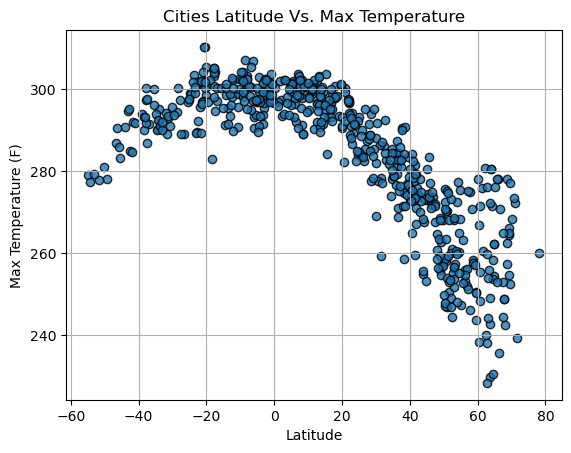

In [14]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lats,
            max_temps,
            edgecolors="black", linewidths=1, marker="o",\
            alpha=0.8, label="Citites")
            
# Incorporate the other graph properties
plt.title("Cities Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

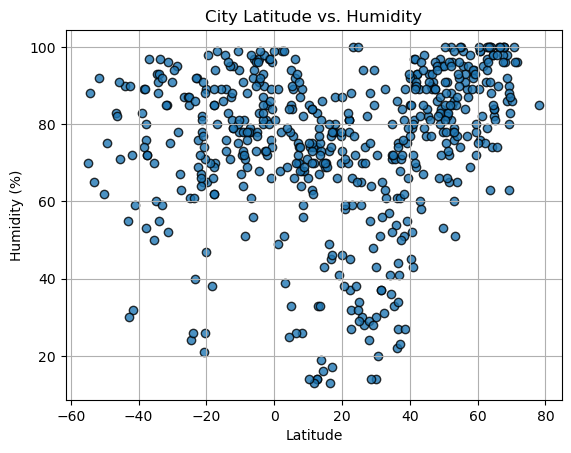

In [16]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lats,
            humidity,
            edgecolor= "black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

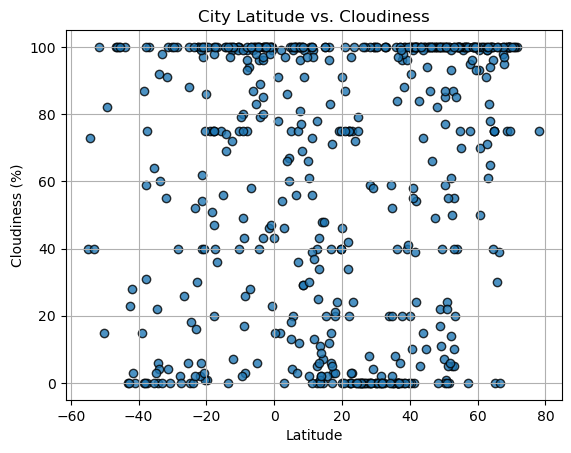

In [17]:
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lats,
            cloudiness,
            edgecolor= "black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

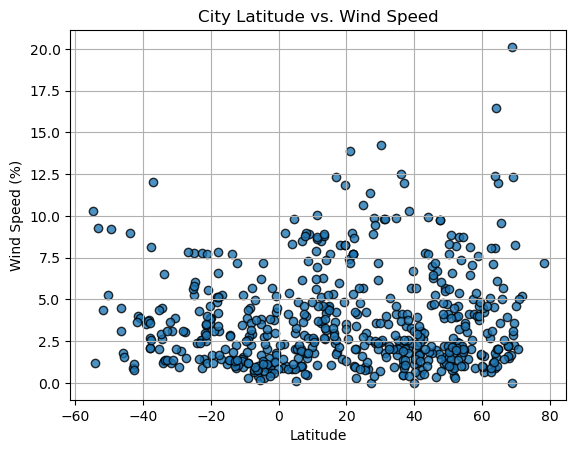

In [18]:
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            wind_speed,
            edgecolor= "black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values *slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    displaytitle = "The r-value is:" + str(r_value)
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(displaytitle, loc='left')
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,275.92,93,100,3.09,US,1704765817
1,bethel,41.3712,-73.4140,272.96,81,0,1.54,US,1704765798
2,bilibino,68.0546,166.4372,242.40,96,100,1.47,RU,1704766077
3,whitehorse,60.7161,-135.0538,255.38,99,50,0.63,CA,1704766078
6,iqaluit,63.7506,-68.5145,249.09,63,65,8.05,CA,1704766081


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ushuaia,-54.8000,-68.3000,278.96,70,40,10.29,AR,1704766079
5,west island,-12.1568,96.8225,302.14,79,7,7.20,CC,1704766080
7,adamstown,-25.0660,-130.1015,297.31,85,100,5.28,PN,1704766082
10,waitangi,-43.9535,-176.5597,290.83,90,100,8.97,NZ,1704766086
11,new plymouth,-39.0667,174.0833,293.88,83,15,3.55,NZ,1704766087


###  Temperature vs. Latitude Linear Regression Plot

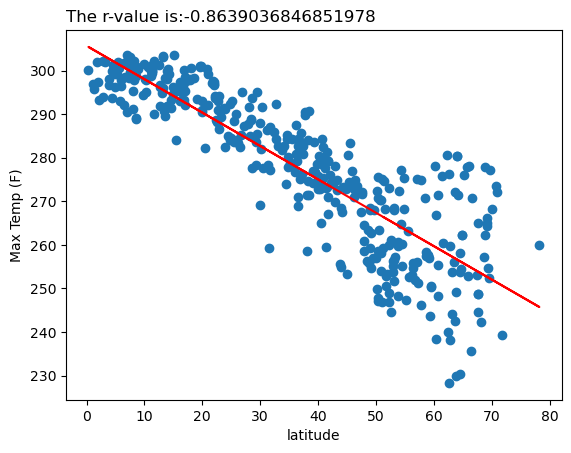

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Max Temp (F)', (10,-10))

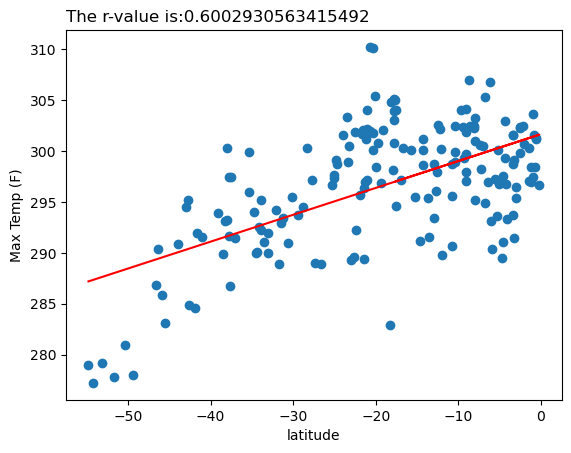

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Max Temp (F)', (-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

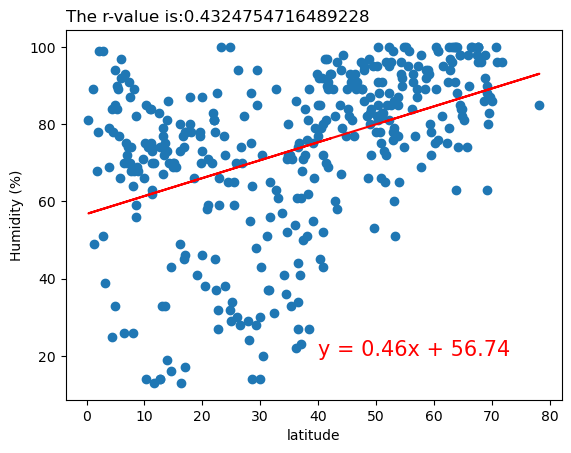

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       'Humidity (%)', (40,20))

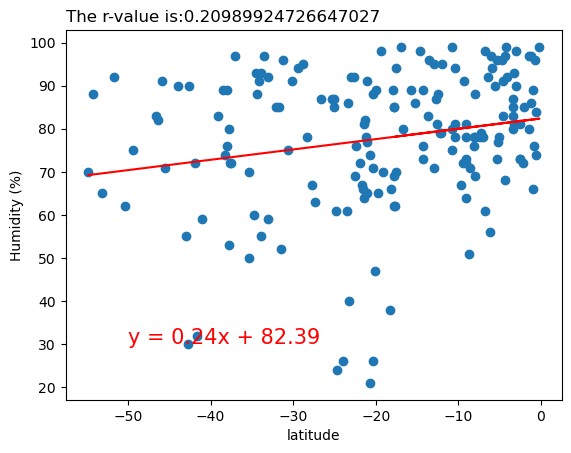

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       'Humidity (%)', (-50,30))

**Discussion about the linear relationship:** From the equator going north, it gets more humid

### Cloudiness vs. Latitude Linear Regression Plot

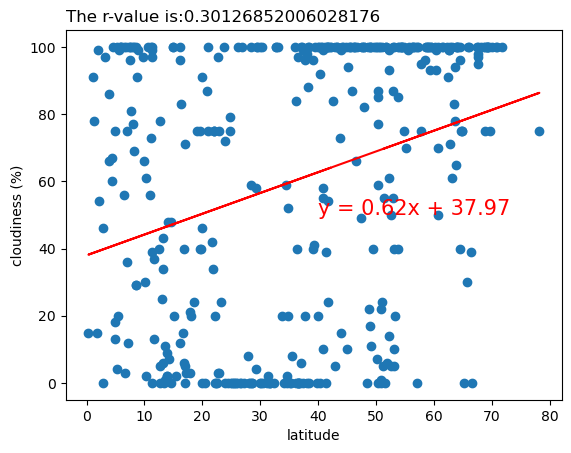

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       'cloudiness (%)', (40,50))

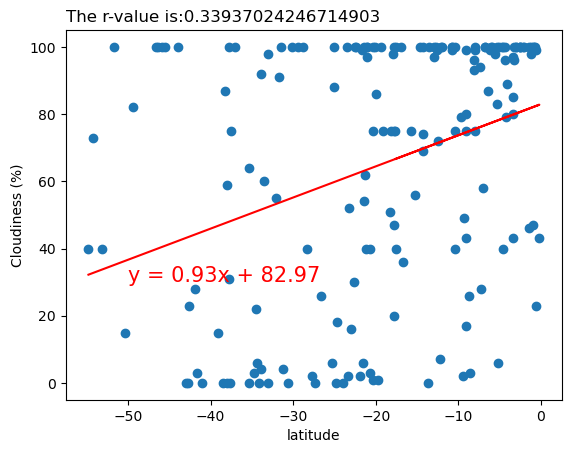

In [28]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       'Cloudiness (%)', (-50,30))

**Discussion about the linear relationship:** From the equator north it gets more cloudy

### Wind Speed vs. Latitude Linear Regression Plot

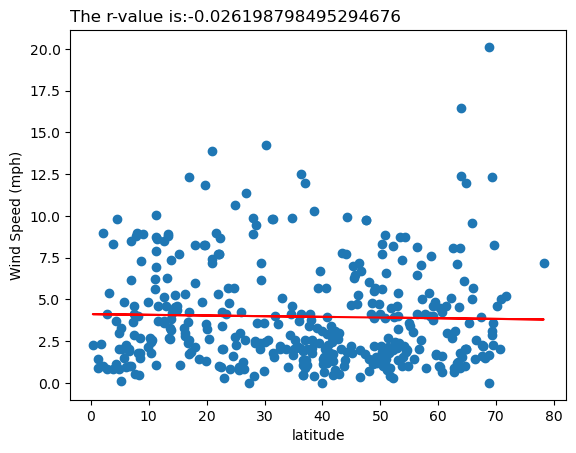

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       'Wind Speed (mph)', (5,30))

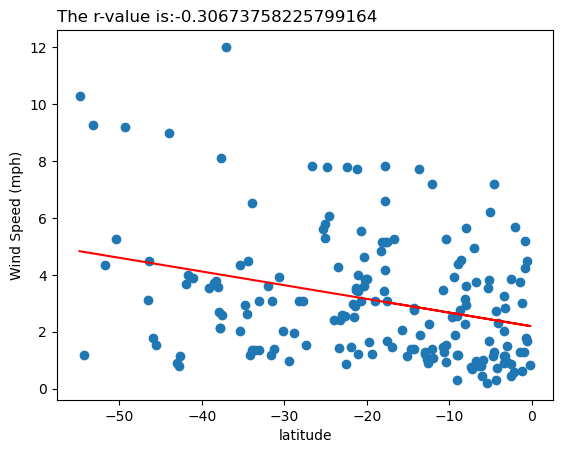

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       'Wind Speed (mph)', (-50,30))

**Discussion about the linear relationship:** In northern hemisphere wind is consistent, in the southern hemisphere it gets less windy as you get to the equator